# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Rafi Kurniansyah
- **Email:** raftoxx@gmail.com
- **ID Dicoding:** raftoxx

## Menentukan Pertanyaan Bisnis

- Kategori produk apa saja yang memiliki penjualan tertinggi dan penjualan terendah?
- Bagaimana  keterkaitan antara penjualan produk yang rendah dengan skor ulasan pembeli?


## Import Semua Packages/Library yang Digunakan

Import Packages atau Library yang digunakan untuk data analisis.
- Pandas: untuk memanipulasi dan analisis data
- matplotlib & seaborn: digunakan untuk visualisasi data


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca seluruh tabel dan memuat menjadi dataframe sekaligus

In [78]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
products_dataset_df = pd.read_csv("/content/products_dataset.csv")
products_translation_df = pd.read_csv("/content/product_category_name_translation.csv")
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
customers_df = pd.read_csv("/content/customers_dataset.csv")


In [79]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [80]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [81]:
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [82]:
products_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [83]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [84]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- product_id terhubung dengan products_dataset_df
- product_category_name bisa digabung dengan product_category_name_english
- pada order_reviews_df terdapat review_score berupa angka yang bisa dijadikan acuan untuk pertanyaan 2
- tabel customers_df tidak terlalu diperlukan untuk 2 pertanyaan yang ada

### Assessing Data

Pada tahap Assessing Data bertujuan untuk memeriksa hal-hal seperti kesesuaian tipe data, missing values, duplicates dan inaccurate value

#### Menilai tabel `orders_df`

In [85]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [86]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [87]:
print("Duplicates: ", orders_df.duplicated().sum())

Duplicates:  0


In [88]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `order_items_df`

In [89]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [90]:
order_items_df.nunique()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [91]:
order_items_df['order_item_id'].value_counts()

,count
order_item_id,
1,98666
2,9803
3,2287
4,965
5,460
6,256
7,58
8,36
9,28


In [92]:
print("Duplicates: ", order_items_df.duplicated().sum())

Duplicates:  0


In [93]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `products_dataset_df`

In [94]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [95]:
products_dataset_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [96]:
print("Duplicates: ", products_dataset_df.duplicated().sum())


Duplicates:  0


In [97]:
products_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `products_translation_df`

In [98]:
products_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [99]:
print("Duplicates: ", products_translation_df.duplicated().sum())


Duplicates:  0


In [100]:
products_english_df = pd.merge(
    left=products_dataset_df,
    right=products_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [101]:
products_english_df.nunique()

,0
product_id,32951
product_category_name,73
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95
product_category_name_english,71


#### Menilai tabel `order_reviews_df`

In [102]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [103]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [104]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `customers_df`

In [105]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [106]:
customers_df.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [107]:
print("Duplicates: ", customers_df.duplicated().sum())

Duplicates:  0


In [108]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- product_category_name terdapat 610 missing value dan perlu dibersihkan
- pada order_reviews_df terdapat missing value yang banyak namun tidak perlu untuk dibersihkan
- products_translation_df hanya memiliki 71 product_name_english, sedangkan diperlukan sebanyak 73 sesuai dengan product_name

### Cleaning Data

tahap ini bertujuan untuk membersihkan data yang telah teridentifikasi dalam proses assessing data sebelumnya seperti missing values

#### Membersihkan tabel `products_dataset_df` dan `products_translation_df` (Yang telah di-merge menjadi `products_english_df`)

##### Missing Values

In [109]:
products_english_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2
product_category_name_english,623


In [110]:
products_english_df[products_english_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0,NaN


In [111]:
products_english_df.fillna({"product_category_name": "Unknown"}, inplace=True)

In [112]:
products_english_df[products_english_df.product_category_name_english.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,Unknown,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,Unknown,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,Unknown,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,Unknown,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,Unknown,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,Unknown,NaN,NaN,NaN,1800.0,30.0,20.0,70.0,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,Unknown,NaN,NaN,NaN,800.0,30.0,10.0,23.0,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,Unknown,NaN,NaN,NaN,200.0,21.0,8.0,16.0,NaN
32772,fa51e914046aab32764c41356b9d4ea4,Unknown,NaN,NaN,NaN,1300.0,45.0,16.0,45.0,NaN


In [113]:
missing_english_categories = products_english_df[products_english_df['product_category_name_english'].isna()]['product_category_name'].unique()
print("Categories missing translations:", missing_english_categories)

Categories missing translations: ['Unknown' 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


In [114]:
new_translations = {
    'Unknown': 'Unknown',
    'pc_gamer': 'pc_gamer',
    'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_food_preparers'
}
products_english_df['product_category_name_english'] = products_english_df['product_category_name'].map(new_translations).fillna(products_english_df['product_category_name_english'])


In [115]:
products_english_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2
product_category_name_english,0


**Insight:**
- nilai null pada product_category_name telah diganti dengan 'Unknown'
- missing value pada product_category_name_english sesuai dengan map(new_translations)

## Exploratory Data Analysis (EDA)

Mengeksplor data untuk menjawab pertanyaan-pertanyaan yang ada, seperti mengurutkan dan menjumlah order_item_id dan prices

### Explore `order_items_df`

In [116]:
order_items_df.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
58097,843b7dada8b84daa895c7978c62f9e43,1,ee6c49af1a2de55aa0e076257ab4ab99,e9bc59e7b60fc3063eb2290deda4cced,2018-08-02 14:31:06,125.00,14.22
44989,6649ebec1c6f3e185a64238dc8729d72,1,42189544021ccb7369862e7ee218d828,b18dc380845b24038cfc48006478f099,2018-03-02 16:55:54,99.89,16.46
78087,b1af0e84814ea77191dddbb863dc896a,1,694e58e56c74114ee0628c25f3f26f8c,7008613ea464bad5cb9b83456e1e6a8f,2017-08-17 09:25:09,52.50,26.91
40259,5ba291a4740d9f7973e2f135a6a7f54f,1,cb035acb0af5f79c8ebad476b968574a,70a12e78e608ac31179aea7f8422044b,2017-05-12 11:55:15,39.00,12.69
85756,c2cd5bc346758b7a8259cc0d1f974824,1,68e1b58c49059e266502773ceb45c249,fac1a9017ade7bdc94058fc1c969f355,2018-05-17 15:30:26,218.20,19.41
76968,af3c2eceb3e982cca67b0bc26d5063d7,1,44a34214a57dc373dcd80f54c919d006,7008613ea464bad5cb9b83456e1e6a8f,2018-02-28 23:50:39,29.50,16.11
107628,f49051d4b155a83c8d939a1c6a850689,2,829b1d3da6a5e54d51055338281a5dfe,1900267e848ceeba8fa32d80c1a5f5a8,2017-09-14 04:55:12,88.99,9.38
29567,4336f383d6d1f9c9d968406c7a920fd3,2,5b3e03e8dfa69568003b9f9ca8e9344d,a416b6a846a11724393025641d4edd5e,2018-02-16 19:28:19,26.14,11.73
101216,e5967b8295716dd4da3550bb3fe5cf58,1,5b3b5f9ae84ca9ead3138b199420cc94,adbc26658d6c7b4b6219f9d934598091,2017-12-12 10:30:53,139.00,19.21
32441,4989085cad96697e77c016d0e856b166,1,c6ab810300ecce0784a66d36fcb5560f,c26a2be5b53b7db6b276280da212a779,2018-04-22 22:31:35,299.00,89.38


In [117]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [118]:
order_items_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


In [119]:
order_items_df.groupby(by="product_id").agg({
    "order_item_id": "count",
    "price":  "sum"
})

,order_item_id,price
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,1,101.65
00088930e925c41fd95ebfe695fd2655,1,129.90
0009406fd7479715e4bef61dd91f2462,1,229.00
000b8f95fcb9e0096488278317764d19,2,117.80
000d9be29b5207b54e86aa1b1ac54872,1,199.00
...,...,...
fff6177642830a9a94a0f2cba5e476d1,2,229.98
fff81cc3158d2725c0655ab9ba0f712c,1,90.00
fff9553ac224cec9d15d49f5a263411f,1,32.00


### Explore `products_english_df`

In [120]:
products_english_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
20411,cb8c44cb7a6b9152db1dbb0f0342ce29,consoles_games,24.0,879.0,1.0,130.0,18.0,3.0,15.0,consoles_games
29376,4689718bc1b839a9baeaa91d2c278598,cama_mesa_banho,42.0,1042.0,6.0,3300.0,50.0,15.0,40.0,bed_bath_table
3464,241a1ffc9cf969b27de6e72301020268,automotivo,48.0,260.0,2.0,400.0,16.0,4.0,11.0,auto
4399,3cb27db8c8015afcf219721d4fc10148,telefonia,50.0,286.0,7.0,200.0,16.0,3.0,11.0,telephony
9203,3077f3765ee2f3471ddc0f6d8f007eac,relogios_presentes,32.0,211.0,2.0,600.0,22.0,4.0,11.0,watches_gifts
8307,7bbe91ccbf899dc40a38d012a4dc411f,eletroportateis,48.0,736.0,1.0,2900.0,16.0,34.0,32.0,small_appliances
23741,3d48e45c02063f74b3a9147ce7ab5196,papelaria,58.0,393.0,2.0,200.0,16.0,3.0,11.0,stationery
21522,e205eb6683dbf1812c2338baf0575ed0,brinquedos,53.0,871.0,4.0,325.0,20.0,23.0,20.0,toys
7894,85f7420fa40ab8ab0d46096ecbecb0b7,automotivo,49.0,1374.0,4.0,400.0,16.0,7.0,11.0,auto
21619,352710ec4fab1854c11d4044880afff3,telefonia,52.0,1350.0,3.0,300.0,16.0,22.0,11.0,telephony


### Explore `order_items_df` & `products_english_df`

#### Merge `order_items_df` & `products_english_df`

In [121]:
order_products_df = pd.merge(
    left=order_items_df,
    right=products_english_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [122]:
important_columns_df = order_products_df[['product_id', 'product_category_name', 'product_category_name_english', 'order_item_id', 'price']]
important_columns_df.head()

,product_id,product_category_name,product_category_name_english,order_item_id,price
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff,1,58.90
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop,1,239.90
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor,1,199.00
3,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery,1,12.99
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools,1,199.90


In [123]:
important_columns_df.nunique()

,0
product_id,32951
product_category_name,74
product_category_name_english,74
order_item_id,21
price,5968


In [124]:
important_columns_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_item_id,price
product_category_name_english,,
health_beauty,11081,1258681.34
watches_gifts,6594,1205005.68
bed_bath_table,13665,1036988.68
sports_leisure,9932,988048.97
computers_accessories,9874,911954.32
...,...,...
flowers,37,1110.04
home_comfort_2,39,760.27
cds_dvds_musicals,16,730.00


### Explore `order_reviews_df`

In [125]:
order_reviews_df.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
31759,e17c3b2f8e99c2094d21a3998b671448,76d297b7eeb8abdaeb5d573e33336449,3,NaN,NaN,2017-10-27 00:00:00,2017-10-31 15:29:13
69229,acf0c889e3208cbfb2fde16602e736ca,74a9eccbfd3a3b0754469cd587ee4920,4,NaN,NaN,2018-06-06 00:00:00,2018-06-07 12:42:48
33019,c1bb086f597f9250796a3cdb3b9d06ad,a1a6eadae352582010f449d8527b55f3,5,NaN,NaN,2018-08-25 00:00:00,2018-08-26 02:05:07
24688,169e7863c73f5a301405a29ac62dd71b,705c7fd61dcb0c54b80538158eec1f4a,3,NaN,NaN,2017-02-21 00:00:00,2017-02-23 18:59:42
29861,99655414706e9803cfebed01dcf96cff,a9a4989d18319f417053642957c9da22,4,NaN,O atendimento ocorreu dentro do esperado e sem...,2017-06-10 00:00:00,2017-06-12 04:08:59
70044,723710c5a7db51f76361c1e0bf97ad3a,8c98f0aff69a4ac8620e15058c497092,4,NaN,NaN,2018-06-26 00:00:00,2018-06-26 21:15:08
43469,def9a12580315bf2479557b615b87bb2,3f741f27f2dd8988d7c287f567a35c52,4,NaN,NaN,2017-06-03 00:00:00,2017-06-04 14:06:59
27888,d3d85f5a0bde9ae3921e7fbb2dda61de,b3b6a35d33a79057c835f4d65c03a2ea,5,NaN,NaN,2017-09-12 00:00:00,2017-09-13 11:50:24
26271,fe687c0f9eb364370845ad15d7682564,be0aa376bf962730ff1c95bd96db95c7,3,NaN,NaN,2018-03-20 00:00:00,2018-03-22 22:24:39
76457,2b614e21736b8234f006135d20066664,1723f84b8a70b486955d59dad4bed0f2,5,NaN,NaN,2018-08-24 00:00:00,2018-08-26 23:08:24


In [126]:
order_reviews_df.sort_values(by="review_score", ascending=True)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49
67160,ca39a1a64d706c6f652d50f524230235,7ef2e75823b06b05aec1e71f3b2b22fa,1,NaN,Ja paguei as parcelas e ainda não recebi meu p...,2017-10-06 00:00:00,2017-10-07 22:21:40
67149,7e005868f6be23ce5856294c707c581e,621d4b50a57e7b6e6d047671cb86cdc1,1,Péssimo produto.,NaN,2018-06-30 00:00:00,2018-07-02 20:30:29
67148,70c5288fea20840ac9836257e016085f,ae59c14f258eb3a13024c976485ca68f,1,NaN,NaN,2018-02-23 00:00:00,2018-02-25 12:37:22
67147,48b290551decf06034ec68f48bcba7b0,8a37cae0305cc1e69d6f5d0629719e9a,1,NaN,NaN,2018-04-19 00:00:00,2018-04-20 10:11:37
...,...,...,...,...,...,...,...
57669,d840dc5cb4178a602a558b05891c3d91,090e9f5faaeef6a858eb1663e67c0838,5,NaN,Muito bom,2017-02-15 00:00:00,2017-02-16 15:55:51
22712,0c9995f8b01029a7d562712a54c0976d,0f2fc60f7acb6782b5490389a5a89c08,5,Ótimo produto,Recebi antes do prazo. E funciona direitinho.,2018-08-10 00:00:00,2018-08-10 19:15:36
22708,41761043ff569d218211f44a61ef6900,882d810d98542e6512788b9a49d6d886,5,NaN,NaN,2017-02-15 00:00:00,2017-02-15 12:49:12
57657,46f966f8b9204492e2b064046abd86bc,cd201e0f6a37139084fa4f76f87e684d,5,NaN,NaN,2018-07-25 00:00:00,2018-07-28 13:14:57


### Explore All Data

#### Menghubungkan semua data

In [127]:
all_df = pd.merge(
    left=order_products_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,pet_shop,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,perfumery,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,garden_tools,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [128]:
all_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "price": "sum",
}).sort_values(by="price", ascending=False).head(10)


,order_item_id,price
product_category_name_english,,
health_beauty,11140,1263138.54
watches_gifts,6604,1206075.33
bed_bath_table,13911,1050936.61
sports_leisure,10001,993656.51
computers_accessories,9959,919640.54
furniture_decor,11663,736282.47
cool_stuff,4088,637258.51
housewares,9080,634542.60
auto,4906,594363.10


In [129]:
all_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "price": "sum",
}).sort_values(by="order_item_id", ascending=False).head(10)


,order_item_id,price
product_category_name_english,,
bed_bath_table,13911,1050936.61
furniture_decor,11663,736282.47
health_beauty,11140,1263138.54
sports_leisure,10001,993656.51
computers_accessories,9959,919640.54
housewares,9080,634542.60
watches_gifts,6604,1206075.33
garden_tools,5895,486432.45
telephony,5166,323839.40


In [130]:
all_df.groupby('product_category_name_english').agg({
    'order_item_id': 'sum',
    'price': 'sum',
    'review_score': 'mean'
}).sort_values(by="price", ascending=True).head(10)

,order_item_id,price,review_score
product_category_name_english,,,
security_and_services,2,283.29,2.500000
fashion_childrens_clothes,8,569.85,4.500000
cds_dvds_musicals,16,730.00,4.642857
home_comfort_2,39,760.27,3.629630
flowers,37,1110.04,4.419355
pc_gamer,11,1545.95,3.333333
diapers_and_hygiene,66,1567.59,3.256410
arts_and_craftmanship,26,1814.01,4.125000
la_cuisine,16,2054.99,4.000000


In [131]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   seller_id                      113314 non-null  object 
 4   shipping_limit_date            113314 non-null  object 
 5   price                          113314 non-null  float64
 6   freight_value                  113314 non-null  float64
 7   product_category_name          113314 non-null  object 
 8   product_name_lenght            111702 non-null  float64
 9   product_description_lenght     111702 non-null  float64
 10  product_photos_qty             111702 non-null  float64
 11  product_weight_g               113296 non-null  float64
 12  product_length_cm             

**Insight:**
- semua dataframe yang relevan telah dimerge menjadi all_df
- setelah dijumlah dan diurutkan, didapatkan top product by revenues adalah health_beauty dan top product by total sales adalah bed_bath_table

## Visualization & Explanatory Analysis

Tahap ini akan menjawab pertanyaan analisis dan membuat visualisasi data untuk penyampaian hasil analisis

### Kategori produk apa saja yang memiliki penjualan tertinggi dan penjualan terendah?

In [132]:
top_selling_categories = all_df.groupby('product_category_name_english').agg({
    'order_item_id': 'sum',
    'price': 'sum'
})
top_selling_categories.sort_values(by='price', ascending=False).head(10).reset_index()

,product_category_name_english,order_item_id,price
0,health_beauty,11140,1263138.54
1,watches_gifts,6604,1206075.33
2,bed_bath_table,13911,1050936.61
3,sports_leisure,10001,993656.51
4,computers_accessories,9959,919640.54
5,furniture_decor,11663,736282.47
6,cool_stuff,4088,637258.51
7,housewares,9080,634542.60
8,auto,4906,594363.10
9,garden_tools,5895,486432.45


In [133]:
worst_selling_categories = all_df.groupby('product_category_name_english').agg({
    'order_item_id': 'sum',
    'price': 'sum'
})
top_selling_categories.sort_values(by='price', ascending=True).head(10).reset_index()

,product_category_name_english,order_item_id,price
0,security_and_services,2,283.29
1,fashion_childrens_clothes,8,569.85
2,cds_dvds_musicals,16,730.00
3,home_comfort_2,39,760.27
4,flowers,37,1110.04
5,pc_gamer,11,1545.95
6,diapers_and_hygiene,66,1567.59
7,arts_and_craftmanship,26,1814.01
8,la_cuisine,16,2054.99
9,fashion_sport,39,2144.50


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

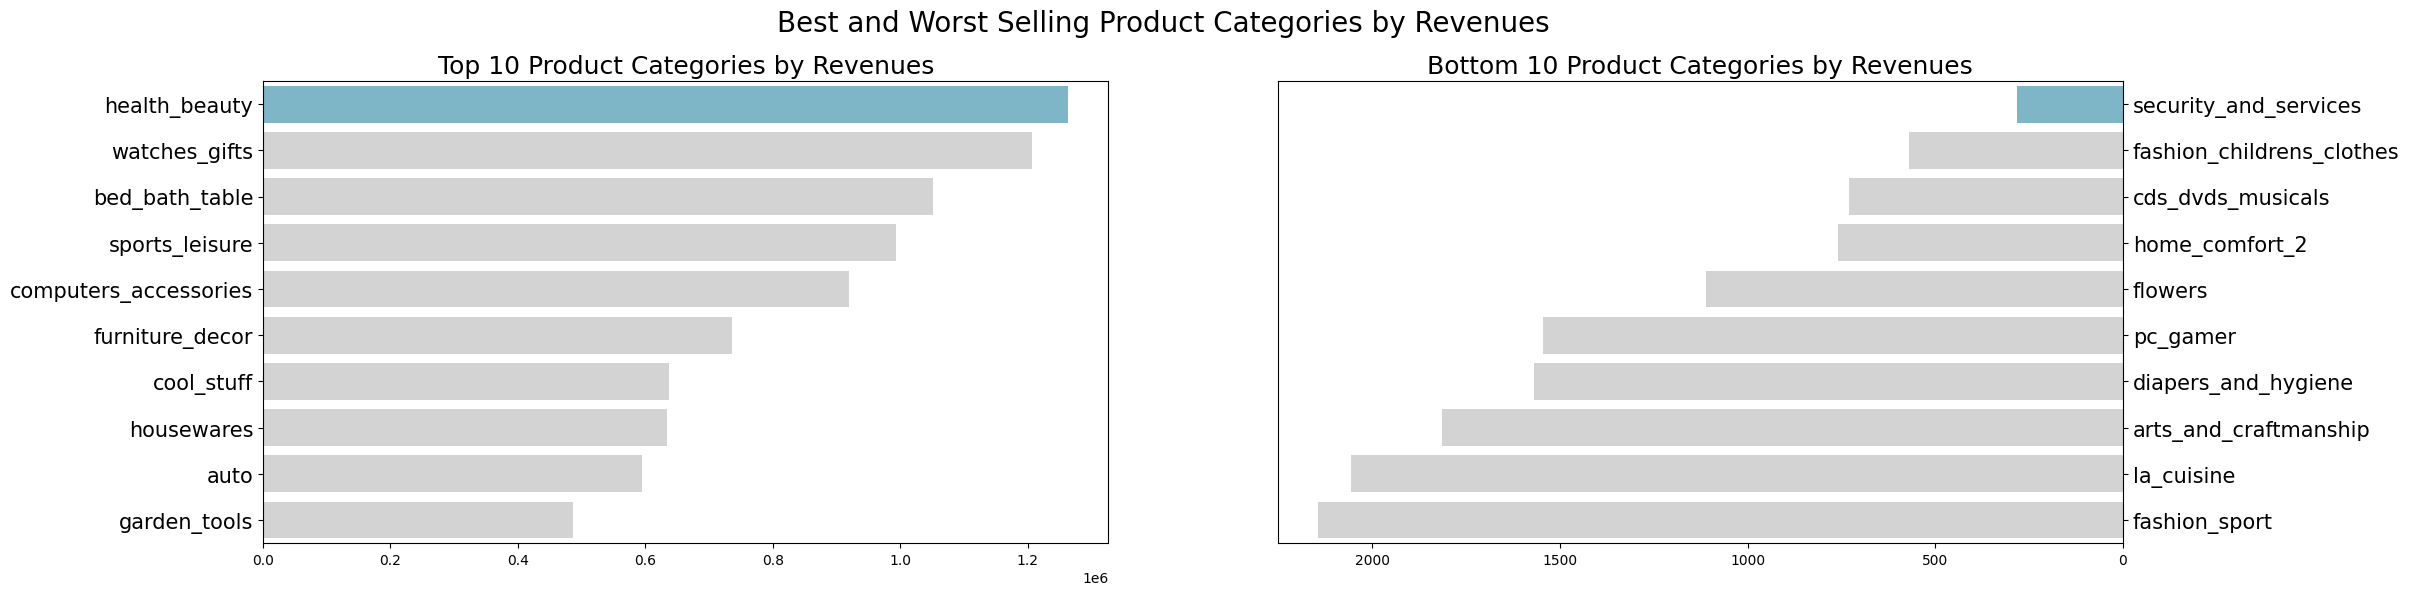

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4"] + ["#D3D3D3"] * 9

sns.barplot(x="price", y="product_category_name_english", data=top_selling_categories.sort_values(by="price", ascending=False).head(10), hue='product_category_name_english', dodge=False, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 10 Product Categories by Revenues", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)


sns.barplot(x="price", y="product_category_name_english", data=worst_selling_categories.sort_values(by="price", ascending=True).head(10), hue='product_category_name_english', dodge=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom 10 Product Categories by Revenues", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)


plt.suptitle("Best and Worst Selling Product Categories by Revenues\n", fontsize=20, y=1)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

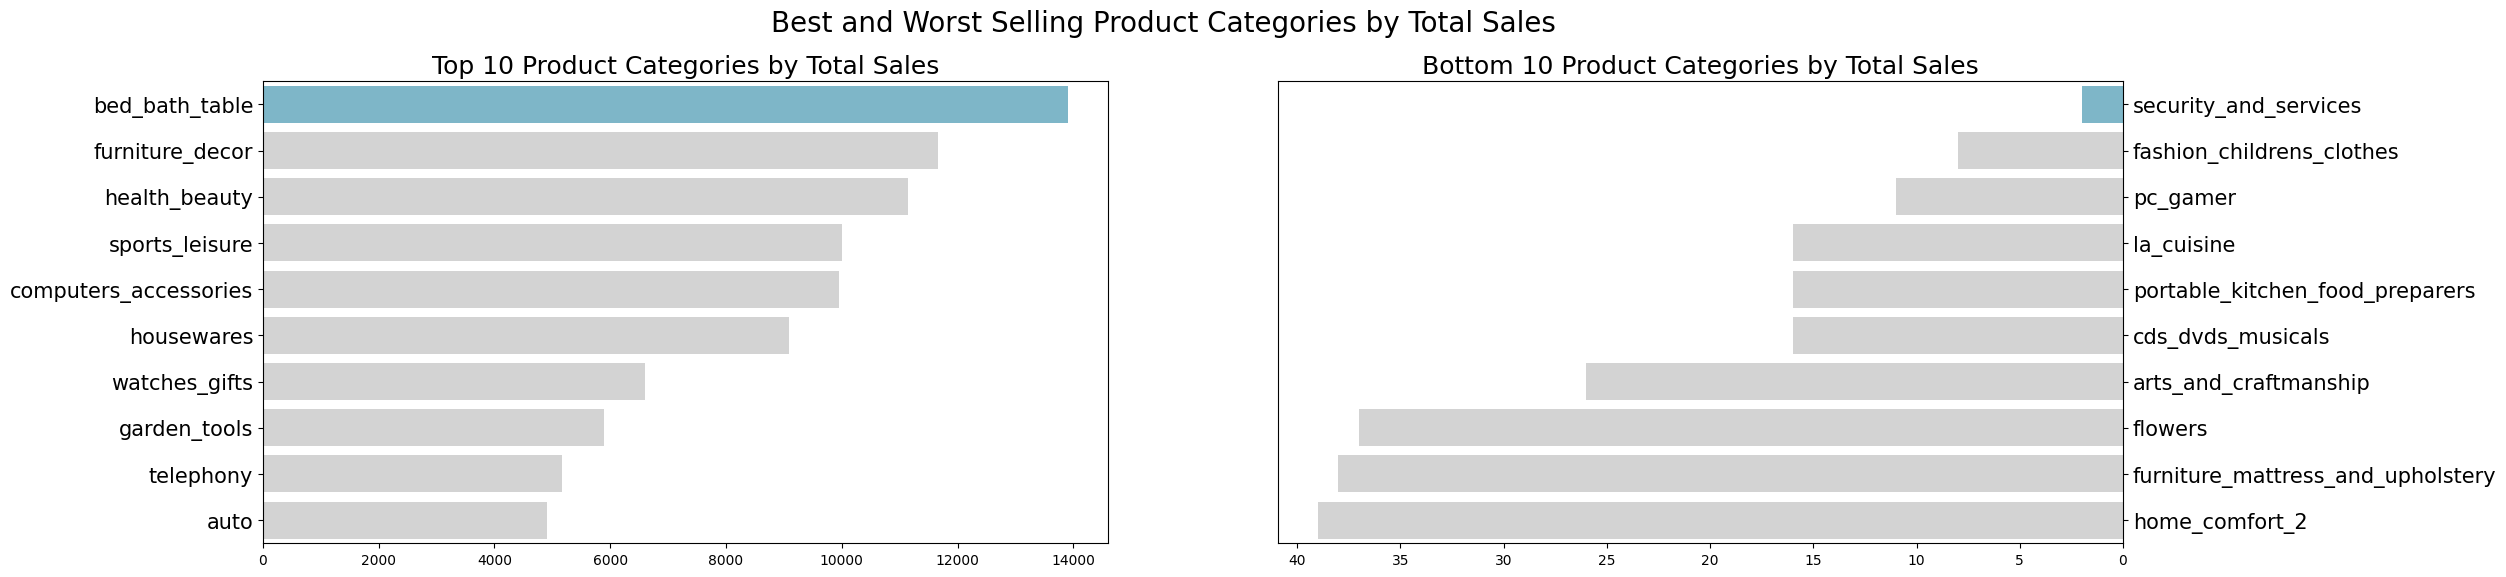

In [135]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4"] + ["#D3D3D3"] * 9

sns.barplot(x="order_item_id", y="product_category_name_english", data=top_selling_categories.sort_values(by="order_item_id", ascending=False).head(10), hue='product_category_name_english', dodge=False, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 10 Product Categories by Total Sales", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)


sns.barplot(x="order_item_id", y="product_category_name_english", data=worst_selling_categories.sort_values(by="order_item_id", ascending=True).head(10), hue='product_category_name_english', dodge=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom 10 Product Categories by Total Sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)


plt.suptitle("Best and Worst Selling Product Categories by Total Sales\n", fontsize=20, y=1)
plt.show()

### Bagaimana  keterkaitan antara penjualan produk yang rendah dengan skor ulasan pembeli?

In [136]:
sales_reviews = all_df.groupby('product_category_name_english').agg({
    'order_item_id': 'sum',
    'price': 'sum',
    'review_score': 'mean'
})
sales_reviews.sort_values(by="order_item_id", ascending=True).head(10)

,order_item_id,price,review_score
product_category_name_english,,,
security_and_services,2,283.29,2.500000
fashion_childrens_clothes,8,569.85,4.500000
pc_gamer,11,1545.95,3.333333
la_cuisine,16,2054.99,4.000000
portable_kitchen_food_preparers,16,3968.53,3.266667
cds_dvds_musicals,16,730.00,4.642857
arts_and_craftmanship,26,1814.01,4.125000
flowers,37,1110.04,4.419355
furniture_mattress_and_upholstery,38,4368.08,3.815789


In [137]:
sales_threshold = sales_reviews['order_item_id'].quantile(0.25)

sales_reviews['sales_category'] = sales_reviews['order_item_id'].apply(
    lambda x: 'Low Sales' if x < sales_threshold else 'High Sales'
)

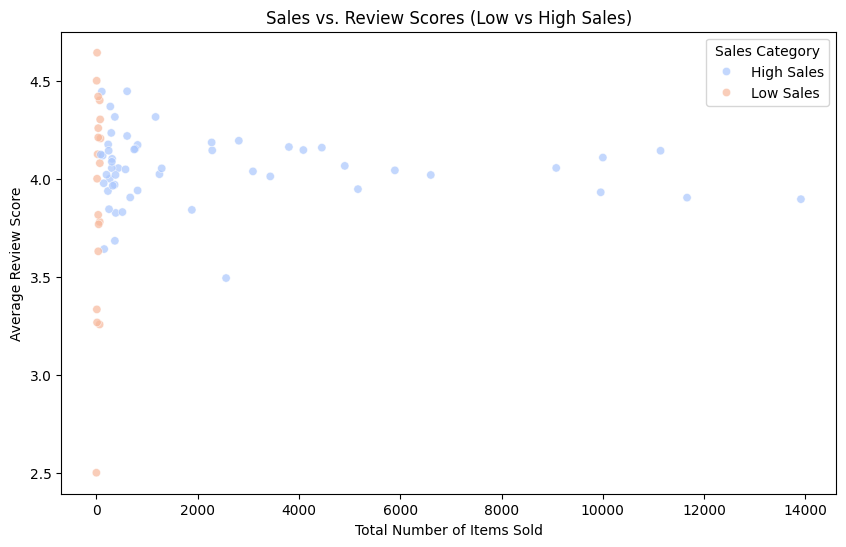

In [138]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='order_item_id', y='review_score', hue='sales_category', data=sales_reviews, palette='coolwarm', alpha=0.7)

plt.title('Sales vs. Review Scores (Low vs High Sales)')
plt.xlabel('Total Number of Items Sold')
plt.ylabel('Average Review Score')
plt.legend(title='Sales Category')
plt.show()


**Insight:**
- berdasarkan chart didapatkan top product by revenues adalah health_beauty dan worst product by revenues adalah security_and_services
- hubungan antara total sales yang rendah dengan rata-rata review scores tidak signifikan

In [139]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

## **- Kategori produk apa saja yang memiliki penjualan tertinggi dan penjualan terendah?**

Kesimpulan pertanyaan dapat dijelaskan berdasarkan visualisasi data yang  telah dibuat yang menunjukkan top & bottom product by revenues dan top & bottom product by total sales:

*   Berdasarkan Revenues: Berdasarkan chart yang dibuat, kategori health_beauty adalah yang paling laris dengan total pendapatan tertinggi, sedangkan kategori security_and_servives merupakan yang terendah.
*   Berdasarkan Total Sales: Di sisi lain, kategori bebd_bath_table memiliki jumlah penjualan tertinggi, sedangkan security_and_servives merupakan yang terendah.

Maka konklusinya adalah Kategori produk health_beauty dan bed_bath_table memiliki performa penjualan terbaik, sementara security_and_services menunjukkan kinerja penjualan yang paling rendah.


## **- Bagaimana keterkaitan antara penjualan produk yang rendah dengan skor ulasan pembeli?**

Untuk pertanyaan ini, dapat disimpulkan bahwa hubungan antara penjualan rendah dengan rata-rata skor ulasan tidak menunjukkan hasil yang signifikan.

Berdasarkan scatter plot yang menampilkan hubungan antara jumlah penjualan dan skor ulasan, ditemukan bahwa produk dengan penjualan rendah tidak selalu memiliki skor ulasan rendah. Beberapa produk dengan sedikit penjualan bahkan memiliki skor ulasan yang cukup baik.

Kesimpulannya adalah jumlah penjualan tidak secara langsung berhubungan dengan kepuasan pelanggan yang diukur melalui skor review.